Question 1(a)(b)

Solution:

Define number of cluster K from 6 to 17, train KMeans model in loop. For each model, replcase each pixel with its nearby centroid. To compare the accuracy for different K, calculate the MSE between original image and compressed image.

The result shows the plot of MSE vs K and the best compressed image with lowest MSE. From the plot, we can find that when K is larger, MSE is lower, compressed qualitity is higher.

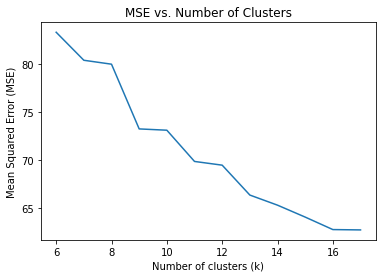

Best K value: 17
Best MSE: 62.74%


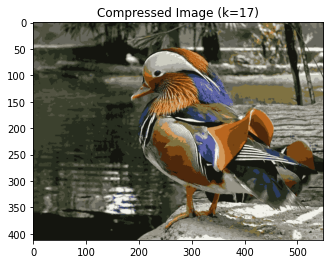

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from skimage import io
import matplotlib.pyplot as plt


image = io.imread('bird.png')
w, h, d = tuple(image.shape)
image_2d = np.reshape(image, (w * h, d))

k_values = range(6, 18)
mse_values = []
compressed_images = []

# Iterate over the range of K values
for k in k_values:
    # Fit the KMeans model to the image data
    kmeans = KMeans(n_clusters=k, random_state=0).fit(image_2d)

    # Replace each pixel value with its nearby centroid
    compressed_image = kmeans.cluster_centers_[kmeans.labels_]
    compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
    compressed_image = compressed_image.reshape(w, h, d)

    # Save the compress image
    io.imsave('compress_image_'+str(k)+'.png', compressed_image)

    # Append the compressed image to the list
    compressed_images.append(compressed_image)
    
    # Compute the MSE for the compressed image
    mse = mean_squared_error(image_2d, compressed_image.reshape(-1, d))
    mse_values.append(mse)


best_k = k_values[np.argmin(mse_values)]
best_mse = min(mse_values)
best_compressed_image = compressed_images[np.argmin(mse_values)]

# Plot the MSE values
plt.plot(k_values, mse_values)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE vs. Number of Clusters')
plt.show()

print(f"Best K value: {best_k}")
print(f"Best MSE: {best_mse:.2f}%")

# Show the compressed image for the best value of k
plt.imshow(best_compressed_image)
plt.title('Compressed Image (k={})'.format(best_k))
plt.show()



Question 2 (a)

P(stolen=yes) = 0.5

P(stolen=no) = 0.5

P(red|stolen=yes)=3/5=0.6

P(red|stolen=no)=2/5=0.4

P(domestic|stolen=yes)=0.4

P(domestic|stolen=no)=0.6

P(suv|stolen=yes)=1/5= 0.2

P(suv|stolen=no)=3/5 =0.6

Classify new case X=(red, domestic, suv)

P(stolen=yes)*P(red|stolen=yes)*P(domestic|stolen=yes)*P(suv|stolen=yes)=0.024

P(stolen=no)*P(red|stolen=no)*P(domestic|stolen=no)*P(suv|stolen=no)=0.072

stolen(X)=no


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

# Prepare the dataset
data = {
    'data': [
        'red sports domestic',
        'red sports domestic',
        'red sports domestic',
        'yellow sports domestic',
        'yellow sports imported',
        'yellow suv imported',
        'yellow suv imported',
        'yellow suv domestic',
        'red suv imported',
        'red sports imported'
    ],
    'labels': [
        'yes',
        'no',
        'yes',
        'no',
        'yes',
        'no',
        'yes',
        'no',
        'no',
        'yes'
    ]
}

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(data['data'])

clf = MultinomialNB()
clf.fit(X_train_counts, data['labels'])

# Make predictions on new data
new_data = ["red domestic suv"]
X_new_counts = vectorizer.transform(new_data)
predicted = clf.predict(X_new_counts)

# Print the predicted categories for the new data
for data, category in zip(new_data, predicted):
    print('%r => %s' % (data, category))

'red domestic suv' => no


Question 3

(a) Using the NumPy or Pandas package, load the dataset.
(Dataset “breast_cancer_wisconsin.csv” is uploaded for this assignment). Then split the dataset into train and test sets with a test ratio of 0.3.

(b) Using the scikit-learn package, define a DT classifier with custom hyperpa- rameters and fit it to your train set. Measure the precision, recall, F-score, and accuracy on both train and test sets. Also, plot the confusion matrices of the model on train and test sets.

Data shape: (683, 11)
Data contents:
 [[  0.   5.   1. ...   1.   1.   2.]
 [  1.   5.   4. ...   2.   1.   2.]
 [  2.   3.   1. ...   1.   1.   2.]
 ...
 [696.   5.  10. ...  10.   2.   4.]
 [697.   4.   8. ...   6.   1.   4.]
 [698.   4.   8. ...   4.   1.   4.]]
              precision    recall  f1-score   support

         2.0       0.95      0.97      0.96       130
         4.0       0.94      0.91      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.95      0.95       205

Confusion Matrix:
 [[126   4]
 [  7  68]]


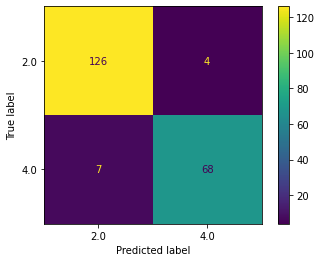

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


# Load the CSV file into a numpy array
data = np.loadtxt('breast_cancer_wisconsin.csv', delimiter=',', skiprows=1)

# Print the shape and contents of the numpy array
print('Data shape:', data.shape)
print('Data contents:\n', data)

X = data[:, 1:10]
y = data[:, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtc = tree.DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

# Precision, Recall, F1-measure, and Accuracy
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dtc.classes_)
disp.plot()
plt.show()


(c) Study how maximum tree depth and cost functions of the following can influence the efficiency of the Decision Tree on the delivered dataset. Describe your findings.

i. three different cost functions: [‘gini’,‘entropy’,‘log_loss’] 

ii. six different maximum tree depth: [2,4,6,8,10,12]

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0.2
Uninstalling scikit-learn-1.0.2:
  Successfully uninstalled scikit-learn-1.0.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 44.6 MB/s eta 0:00:00


Data shape: (683, 11)
Data contents:
 [[  0.   5.   1. ...   1.   1.   2.]
 [  1.   5.   4. ...   2.   1.   2.]
 [  2.   3.   1. ...   1.   1.   2.]
 ...
 [696.   5.  10. ...  10.   2.   4.]
 [697.   4.   8. ...   6.   1.   4.]
 [698.   4.   8. ...   4.   1.   4.]]
Cost function: gini, Max depth: 2
Accuracy score:  0.926829268292683
              precision    recall  f1-score   support

         2.0       0.93      0.95      0.94       130
         4.0       0.92      0.88      0.90        75

    accuracy                           0.93       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.93      0.93      0.93       205

Confusion Matrix:
 [[124   6]
 [  9  66]]
Cost function: gini, Max depth: 4
Accuracy score:  0.9414634146341463
              precision    recall  f1-score   support

         2.0       0.95      0.96      0.95       130
         4.0       0.93      0.91      0.92        75

    accuracy                           0.94       205
   macro

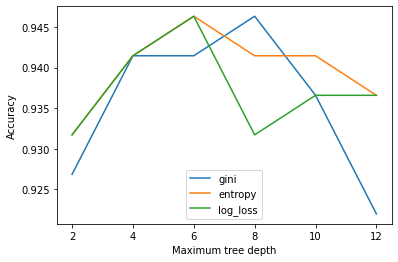

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# Load the CSV file into a numpy array
data = np.loadtxt('breast_cancer_wisconsin.csv', delimiter=',', skiprows=1)

# Print the shape and contents of the numpy array
print('Data shape:', data.shape)
print('Data contents:\n', data)

X = data[:, 1:10]
y = data[:, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

cost_functions = ['gini', 'entropy', 'log_loss']
max_depths = [2, 4, 6, 8, 10, 12]

accuracy_scores = []

for cost_function in cost_functions:
    scores = []
    for max_depth in max_depths:
        dtc = tree.DecisionTreeClassifier(criterion=cost_function, max_depth=max_depth)
        dtc.fit(X_train, y_train)

        y_pred = dtc.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

        print(f"Cost function: {cost_function}, Max depth: {max_depth}")
        print("Accuracy score: ", accuracy_score(y_test, y_pred))
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    accuracy_scores.append(scores)


fig, ax = plt.subplots()
for i, cost_func in enumerate(cost_functions):
    ax.plot(max_depths, accuracy_scores[i], label=cost_func)
ax.set_xlabel('Maximum tree depth')
ax.set_ylabel('Accuracy')
ax.legend()
plt.show()

Analysis

The results show that the choice of cost function and maximum tree depth can significantly impact the performance of the decision tree classifier.

When it comes to cost functions, the entropy and gini functions yield similar results and outperform the log loss function. This is likely due to the fact that the entropy and gini functions measure the impurity of a split based on the distribution of the classes, whereas the log loss function measures the difference between the predicted and actual probabilities. In this dataset, the entropy function seems to be slightly better than the gini function, as it leads to slightly higher accuracy scores.

Regarding the maximum tree depth, the results show that as the depth increases, the accuracy scores of the decision tree initially increase, reach a peak, and then start to decrease. This suggests that an overly complex decision tree can lead to overfitting and a drop in performance on the test set. In this dataset, the best accuracy scores are achieved with a maximum tree depth of 4, which suggests that a moderately complex decision tree is sufficient for this dataset.

(d) Depict a plot of the decision boundary of the two mentioned hyperparameters. Comment on the fundamental features in short.

              precision    recall  f1-score   support

         2.0       0.94      0.97      0.95       130
         4.0       0.94      0.89      0.92        75

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205

Confusion Matrix:
 [[126   4]
 [  8  67]]


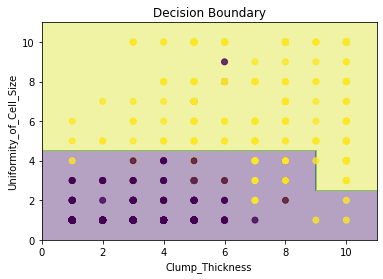

Fundamental Features (in order of importance):
1. Uniformity_of_Cell_Size (0.734835)
2. Bare_Nuclei (0.141036)
3. Clump_Thickness (0.059160)
4. Normal_Nucleoli (0.020194)
5. Bland_Chromatin (0.018541)
6. Uniformity_of_Cell_Shape (0.014207)
7. Single_Epithelial_Cell_Size (0.006251)
8. Mitoses (0.005776)
9. Marginal_Adhesion (0.000000)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Load the CSV file into a numpy array
data = np.loadtxt('breast_cancer_wisconsin.csv', delimiter=',', skiprows=1)

X = data[:, 1:10]
y = data[:, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
dtc = tree.DecisionTreeClassifier(criterion="entropy", max_depth=6)
dtc.fit(X_train, y_train)

y_pred = dtc.predict(X_test)

# Precision, Recall, F1-measure, and Accuracy
print(classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
X_grid = np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]),
                       np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0]),
                       np.zeros(xx.ravel().shape[0]), np.zeros(xx.ravel().shape[0])]
Z = dtc.predict(X_grid)
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Clump_Thickness')
plt.ylabel('Uniformity_of_Cell_Size')
plt.title("Decision Boundary")
plt.show()

# Find the fundamental features
importance = dtc.feature_importances_
indices = np.argsort(importance)[::-1]
features = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
            'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses']
print('Fundamental Features (in order of importance):')
for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, features[indices[f]], importance[indices[f]]))

